In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from itertools import permutations

In [4]:
[ ' '.join(i) for i in permutations('good morning rosy'.split(),3)]

['good morning rosy',
 'good rosy morning',
 'morning good rosy',
 'morning rosy good',
 'rosy good morning',
 'rosy morning good']

In [5]:
# find permutations of this string
s = """Find textbooks with titles containing 'NLP',or 'natural' and 'language', or'computational' and 'linguistics'."""

In [6]:
import math
math.factorial(len(s.split()))

479001600

In [7]:
# other way around
np.arange(1,len(s.split())+1).prod()

479001600

In [8]:
# array operations
print(np.arange(1,len(s.split())+1).sum())
print(np.arange(1,len(s.split())+1).max())
print(np.arange(1,len(s.split())+1).min())

78
12
1


In [9]:
# getting only even numbers product in an array
np.array([ i for i in np.arange(1,len(s.split())+1) if i % 2 == 0]).prod()

46080

In [10]:
# list operations
lis = [10,20,30,40,50]
lis
print(sum(lis),'\n')
print(min(lis),'\n')
print(max(lis),'\n')

150 

10 

50 



In [11]:
sent = "Thomas Jefferson began building Monticello at the age of 26."
sent.split()

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 'at',
 'the',
 'age',
 'of',
 '26.']

In [12]:
token_sent = sent.split()
print(token_sent)

['Thomas', 'Jefferson', 'began', 'building', 'Monticello', 'at', 'the', 'age', 'of', '26.']


In [13]:
vacab = sorted(set(token_sent))
print(vacab)

['26.', 'Jefferson', 'Monticello', 'Thomas', 'age', 'at', 'began', 'building', 'of', 'the']


In [14]:
vacab = sorted(set(token_sent))
','.join(vacab)

'26.,Jefferson,Monticello,Thomas,age,at,began,building,of,the'

In [15]:
print(len(token_sent))

print(len(vacab))

10
10


In [16]:
one_hotvector = np.zeros((len(token_sent), len(vacab)), dtype = int)
one_hotvector

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [17]:
for i , word in enumerate(token_sent):
    print(i, word)

0 Thomas
1 Jefferson
2 began
3 building
4 Monticello
5 at
6 the
7 age
8 of
9 26.


In [18]:
for i , word in enumerate(token_sent):
    one_hotvector[i, vacab.index(word)] = 1

print(' '.join(vacab))    
one_hotvector    

26. Jefferson Monticello Thomas age at began building of the


array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [19]:
df = pd.DataFrame(data = one_hotvector, columns=vacab)
df

,26.,Jefferson,Monticello,Thomas,age,at,began,building,of,the
0,0,0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0
9,1,0,0,0,0,0,0,0,0,0


In [20]:
df[df==0] = ''
df

,26.,Jefferson,Monticello,Thomas,age,at,began,building,of,the
0,,,,1,,,,,,
1,,1,,,,,,,,
2,,,,,,,1,,,
3,,,,,,,,1,,
4,,,1,,,,,,,
5,,,,,,1,,,,
6,,,,,,,,,,1
7,,,,,1,,,,,
8,,,,,,,,,1,
9,1,,,,,,,,,


### Tokenizers

In [21]:
sentence = """Thomas Jefferson began building! Monticello's at the age of 26."""
sentence

"Thomas Jefferson began building! Monticello's at the age of 26."

In [22]:
sentence.split()

['Thomas',
 'Jefferson',
 'began',
 'building!',
 "Monticello's",
 'at',
 'the',
 'age',
 'of',
 '26.']

In [23]:
import re
tok = re.split(r'[-\s.,;!?]+', sentence)
tok

['Thomas',
 'Jefferson',
 'began',
 'building',
 "Monticello's",
 'at',
 'the',
 'age',
 'of',
 '26',
 '']

In [24]:
pattern = re.compile(r"([-\s.,;!?])+")

In [25]:
toke1 = pattern.split(sentence)
toke1

['Thomas',
 ' ',
 'Jefferson',
 ' ',
 'began',
 ' ',
 'building',
 ' ',
 "Monticello's",
 ' ',
 'at',
 ' ',
 'the',
 ' ',
 'age',
 ' ',
 'of',
 ' ',
 '26',
 '.',
 '']

In [26]:
[i  for i in toke1 if i not in '- \t\n.,;!?']

['Thomas',
 'Jefferson',
 'began',
 'building',
 "Monticello's",
 'at',
 'the',
 'age',
 'of',
 '26']

In [27]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [28]:
Regtoken = RegexpTokenizer(r'\w+|$[0-9.]+|\S+')

In [29]:
Regtoken.tokenize(sentence)

['Thomas',
 'Jefferson',
 'began',
 'building',
 '!',
 'Monticello',
 "'s",
 'at',
 'the',
 'age',
 'of',
 '26',
 '.']

In [30]:
[i for i in Regtoken.tokenize(sentence) if i not in '- \t\n.,;!?']

['Thomas',
 'Jefferson',
 'began',
 'building',
 'Monticello',
 "'s",
 'at',
 'the',
 'age',
 'of',
 '26']

In [31]:
from nltk.tokenize import TreebankWordTokenizer, word_tokenize

In [32]:
sentence = """Monticello wasn't designated as UNESCO World Heritage Site until 1987."""
sentence

"Monticello wasn't designated as UNESCO World Heritage Site until 1987."

In [33]:
# type 1
sentence.split()

['Monticello',
 "wasn't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987.']

In [34]:
# type 2
word_tokenize(sentence)

['Monticello',
 'was',
 "n't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987',
 '.']

In [35]:
#type 3
TreebankWordTokenizer().tokenize(sentence)

['Monticello',
 'was',
 "n't",
 'designated',
 'as',
 'UNESCO',
 'World',
 'Heritage',
 'Site',
 'until',
 '1987',
 '.']

In [36]:
message = """RT @TJMonticello Best day everrrrrrr at Monticello. Awesommmmmmeeeeeeee day :*)"""
message

'RT @TJMonticello Best day everrrrrrr at Monticello. Awesommmmmmeeeeeeee day :*)'

In [37]:
from nltk.tokenize import casual_tokenize
# The casual_tokenize function allows you to strip usernames and reduce the number of repeated characters within a token:

In [38]:
casual_tokenize(message, reduce_len= True,strip_handles= True )

['RT',
 'Best',
 'day',
 'everrr',
 'at',
 'Monticello',
 '.',
 'Awesommmeee',
 'day',
 ':*)']

### n-grams

In [39]:
sentence = """Thomas Jefferson began building Monticello at the !age? of 26."""
sentence

'Thomas Jefferson began building Monticello at the !age? of 26.'

In [40]:
pattern = re.compile(r"([-\s.,;!?])+")
tokens = pattern.split(sentence)
print(tokens, '\n')
clean_tokens = [i for i in tokens if i not in '- \t\n.,:!?']
print(clean_tokens)

['Thomas', ' ', 'Jefferson', ' ', 'began', ' ', 'building', ' ', 'Monticello', ' ', 'at', ' ', 'the', '!', 'age', ' ', 'of', ' ', '26', '.', ''] 

['Thomas', 'Jefferson', 'began', 'building', 'Monticello', 'at', 'the', 'age', 'of', '26']


In [41]:
from nltk.util import ngrams

In [42]:
list(ngrams(clean_tokens, n = 2))

[('Thomas', 'Jefferson'),
 ('Jefferson', 'began'),
 ('began', 'building'),
 ('building', 'Monticello'),
 ('Monticello', 'at'),
 ('at', 'the'),
 ('the', 'age'),
 ('age', 'of'),
 ('of', '26')]

In [43]:
list(ngrams(clean_tokens, n =3))

[('Thomas', 'Jefferson', 'began'),
 ('Jefferson', 'began', 'building'),
 ('began', 'building', 'Monticello'),
 ('building', 'Monticello', 'at'),
 ('Monticello', 'at', 'the'),
 ('at', 'the', 'age'),
 ('the', 'age', 'of'),
 ('age', 'of', '26')]

In [44]:
tri_grams = [ ' '.join(i) for i in list(ngrams(clean_tokens, 3))]
tri_grams

['Thomas Jefferson began',
 'Jefferson began building',
 'began building Monticello',
 'building Monticello at',
 'Monticello at the',
 'at the age',
 'the age of',
 'age of 26']

### bag of words of trigram

In [45]:
tri_grams

['Thomas Jefferson began',
 'Jefferson began building',
 'began building Monticello',
 'building Monticello at',
 'Monticello at the',
 'at the age',
 'the age of',
 'age of 26']

In [46]:
vacab_tri = sorted(set(tri_grams))
vacab_tri

['Jefferson began building',
 'Monticello at the',
 'Thomas Jefferson began',
 'age of 26',
 'at the age',
 'began building Monticello',
 'building Monticello at',
 'the age of']

In [47]:
one_hot_matrix = np.zeros((len(tri_grams), len(vacab_tri)),int)
one_hot_matrix

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [48]:
for i, word in enumerate(tri_grams):
    one_hot_matrix[i, vacab_tri.index(word)] = 1
     
one_hot_matrix    

array([[0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 0]])

In [49]:
pd.DataFrame(data = one_hot_matrix, columns= vacab_tri)

,Jefferson began building,Monticello at the,Thomas Jefferson began,age of 26,at the age,began building Monticello,building Monticello at,the age of
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0
6,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0


### mostly 4 grams make sense rather than 3, 2 and 1-gram

In [50]:
sen = 'Suzanne reported as the CEO to the board'
sen

'Suzanne reported as the CEO to the board'

In [51]:
tok = word_tokenize(sen)
tok

['Suzanne', 'reported', 'as', 'the', 'CEO', 'to', 'the', 'board']

In [52]:
bi_grams = [' '.join(i) for i in list(ngrams(tok, n = 2))]
bi_grams

['Suzanne reported',
 'reported as',
 'as the',
 'the CEO',
 'CEO to',
 'to the',
 'the board']

In [53]:
tri_grams = [' '.join(i) for i in list(ngrams(tok, n = 3))]
tri_grams

['Suzanne reported as',
 'reported as the',
 'as the CEO',
 'the CEO to',
 'CEO to the',
 'to the board']

In [54]:
four_grams = [' '.join(i) for i in list(ngrams(tok, n = 4))]
four_grams

['Suzanne reported as the',
 'reported as the CEO',
 'as the CEO to',
 'the CEO to the',
 'CEO to the board']

### stop words

In [55]:
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
len(stop_words)

179

In [57]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

In [58]:
len(sklearn_stop_words)

318

### case folding

In [59]:
tokens = ['House', 'VisiTor', 'Center', 'visitor','WordPress']
tokens

['House', 'VisiTor', 'Center', 'visitor', 'WordPress']

In [60]:
normalized_tokens = [i.lower() for i in tokens]
normalized_tokens

['house', 'visitor', 'center', 'visitor', 'wordpress']

In [61]:
list(set(normalized_tokens))

['house', 'wordpress', 'center', 'visitor']

### Stemming

In [62]:
sen = "dish washer's washed dishes"
sen

"dish washer's washed dishes"

In [63]:
from nltk.stem import PorterStemmer, LancasterStemmer

In [64]:
sen.split()

['dish', "washer's", 'washed', 'dishes']

In [65]:
[PorterStemmer().stem(i).strip("'") for i in sen.split()]

['dish', 'washer', 'wash', 'dish']

###  So lemmatizers are better than stemmers for most applications

In [66]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:
WordNetLemmatizer().lemmatize('better')

'better'

In [68]:
WordNetLemmatizer().lemmatize('better', pos = 'a')

'good'

- **You might be surprised that the first attempt to lemmatize the word “better” didn’t
  change it at all. This is because the part of speech of a word can have a big effect on its
  meaning. If a POS isn’t specified for a word, then the NLTK lemmatizer assumes it’s a
  noun. Once you specify the correct POS, “a” for adjective, the lemmatizer returns the
  correct lemma.**

In [69]:
PorterStemmer().stem('goodness')

'good'

In [70]:
WordNetLemmatizer().lemmatize('goodness')

'goodness'

### sentiment
- **Whether you use raw single-word tokens, n-grams, stems, or lemmas in your NLP pipeline, each of those tokens contains some information. An important part of this information is the word’s sentiment—the overall feeling or emotion that the word invokes.This sentiment analysis—measuring the sentiment of phrases or chunks of text—is acommon application of NLP. In many companies it’s the main thing an NLP engineeris asked to do.**

- **Say you want your NLP pipeline and sentiment analysis algorithm to output a single floating point number between -1 and +1.   Your algorithm would output +1 for text with positive sentiment like, “Absolutely perfect! Love it! :-) :-) :-).” And your      algorithm should output -1 for text with negative sentiment like, “Horrible! Completely useless. :(.” Your NLP pipeline          could use values near 0, like say +0.1, for a statement like, “It was OK. Some good and some bad things.”**

### Math with words(TF-IDF)
- **Bags of words**—Vectors of word counts or frequencies
- **Bags of n-grams**—Counts of word pairs (bigrams), triplets (trigrams), and so on
- **TF-IDF vectors**—Word scores that better represent their importance

In [71]:
sentence = """The faster Harry got to the store, the faster Harry, the faster, would get home."""
sentence   

'The faster Harry got to the store, the faster Harry, the faster, would get home.'

In [72]:
sentence.lower()

'the faster harry got to the store, the faster harry, the faster, would get home.'

In [73]:
from nltk.tokenize import TreebankWordTokenizer
tb_tokenizer = TreebankWordTokenizer()

In [74]:
sent_tokens = tb_tokenizer.tokenize(sentence.lower())
sent_tokens

['the',
 'faster',
 'harry',
 'got',
 'to',
 'the',
 'store',
 ',',
 'the',
 'faster',
 'harry',
 ',',
 'the',
 'faster',
 ',',
 'would',
 'get',
 'home',
 '.']

In [75]:
from collections import Counter

In [76]:
bag_of_words = Counter(sent_tokens)
bag_of_words

Counter({'the': 4,
         'faster': 3,
         'harry': 2,
         'got': 1,
         'to': 1,
         'store': 1,
         ',': 3,
         'would': 1,
         'get': 1,
         'home': 1,
         '.': 1})

In [77]:
bag_of_words.most_common(4)

[('the', 4), ('faster', 3), (',', 3), ('harry', 2)]

In [78]:
# top words 
[ i[0] for i in bag_of_words.most_common(4)]    

['the', 'faster', ',', 'harry']

In [79]:
## TF
how_many_times_harry_apperas = bag_of_words['harry']
how_many_times_harry_apperas

2

In [80]:
toatl_length_of_document = len(bag_of_words)
toatl_length_of_document

11

In [81]:
tf = how_many_times_harry_apperas/toatl_length_of_document
round(tf,4)

0.1818

###  analysis on Kites data

In [82]:
kites_text = """A kite is traditionally a tethered heavier-than-air craft with wing surfaces that react
against the air to create lift and drag. A kite consists of wings, tethers, and anchors.
Kites often have a bridle to guide the face of the kite at the correct angle so the wind
can lift it. A kite’s wing also may be so designed so a bridle is not needed; when
kiting a sailplane for launch, the tether meets the wing at a single point. A kite may
have fixed or moving anchors. Untraditionally in technical kiting, a kite consists of
tether-set-coupled wing sets; even in technical kiting, though, a wing in the system is
still often called the kite.
The lift that sustains the kite in flight is generated when air flows around the kite’s
surface, producing low pressure above and high pressure below the wings. The
interaction with the wind also generates horizontal drag along the direction of the
wind. The resultant force vector from the lift and drag force components is opposed
by the tension of one or more of the lines or tethers to which the kite is attached. The
anchor point of the kite line may be static or moving (such as the towing of a kite by
a running person, boat, free-falling anchors as in paragliders and fugitive parakites
or vehicle)."""

In [83]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOKESH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
tokens = TreebankWordTokenizer().tokenize(kites_text.lower())
clean_tokens = [ i for i in tokens if i not in stopwords]
bag_of_words = Counter(clean_tokens)
bag_of_words.most_common(5)

[('kite', 11), (',', 9), ('wing', 5), ('lift', 4), ('may', 3)]

In [85]:
tf = bag_of_words['kite']/len(bag_of_words)
round(tf, 4)

0.1158

### document vector

In [86]:
doc_vector = []
doc_length = len(clean_tokens)
for key, value in bag_of_words.most_common():
    doc_vector.append(value/doc_length)
    
doc_vector[:10]    

[0.07913669064748201,
 0.06474820143884892,
 0.03597122302158273,
 0.02877697841726619,
 0.02158273381294964,
 0.02158273381294964,
 0.014388489208633094,
 0.014388489208633094,
 0.014388489208633094,
 0.014388489208633094]

- **tf(t, D)  = count(term t) / count(total document)**
- **idf(t, D) = log (numer of documents / number of documents containing the term t)**
- **tfidf(t, d, D) = tf(t, d) * idf(t, D)**

In [87]:
corpus = ['he is very handsome', 'time is money', 'apples are red but not always', 'blood diamonds from africa']
corpus

['he is very handsome',
 'time is money',
 'apples are red but not always',
 'blood diamonds from africa']

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
vectorizer = TfidfVectorizer(min_df= 1)
model = vectorizer.fit_transform(corpus)
model.todense().round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.53, 0.53, 0.41,
        0.  , 0.  , 0.  , 0.  , 0.53],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.49,
        0.62, 0.  , 0.  , 0.62, 0.  ],
       [0.  , 0.41, 0.41, 0.41, 0.  , 0.41, 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.41, 0.41, 0.  , 0.  ],
       [0.5 , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.5 , 0.5 , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ]])

### finding meaning in words (semantic analysis)
- **Past NLP experimenters found an algorithm for revealing the meaning of word combinations and computing vectors to represent this meaning. It’s called latent semantic analysis (LSA). And when you use this tool, not only can you represent the meaning of words as vectors, but you can use them to represent the meaning of entire documents**

In [90]:
np.random.rand(6)

array([0.69888538, 0.49598211, 0.50759239, 0.01499296, 0.83431209,
       0.63202431])

In [91]:
tfidf = dict(list(zip('cats dogs apple love NYC lion'.split(), np.random.rand(6))))
tfidf

{'cats': 0.627472161050554,
 'dogs': 0.9660673181932067,
 'apple': 0.8139058111619831,
 'love': 0.3309076460970809,
 'NYC': 0.12595202894434865,
 'lion': 0.8616267440790145}

In [92]:
# of you hand picked the weights [0.3,0.3,0,0.1,0.2,0.2]
topic_petness = 0.3*tfidf['cats'] + 0.3*tfidf['dogs'] + 0*tfidf['apple'] + 0.1*tfidf['love'] + 0.2*tfidf['NYC'] + 0.2*tfidf['lion'] 
topic_petness

0.708668362987509

-  **LSA is an algorithm to analyze your TF-IDF matrix (table of TF-IDF vectors) to gather up words into topics. It works on bag-of-words vectors, too, but TF-IDF vectors give slightly better results**

- **The number of topics you need for your model to capture the meaning of your documents is far less than the number of words in the vocabulary of your TF-IDF vectors. So LSA is often referred to as a dimension reduction technique. LSA reduces the number of dimensions you need to capture the meaning of your documents**

### Baby steps with neural networks
- **pthonic neuron**

In [93]:
from PIL import Image

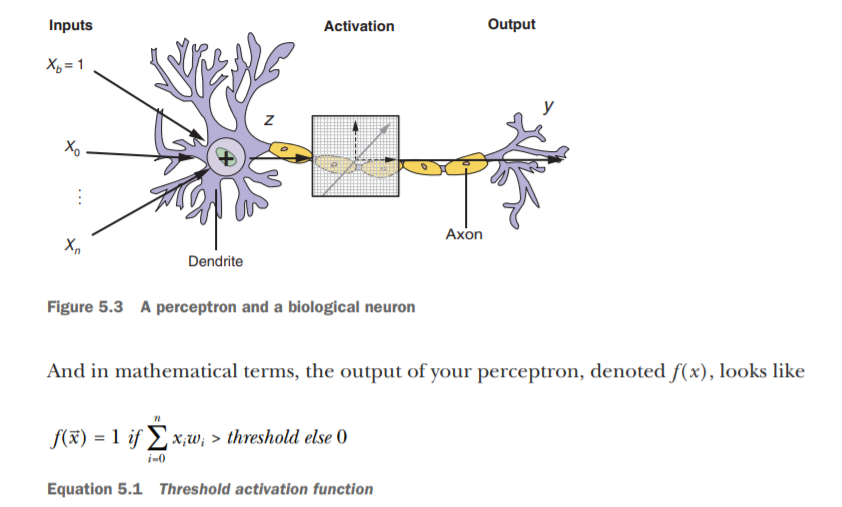

In [94]:
image = Image.open('neuron.png')
image

In [95]:
import numpy as np

In [96]:
def actiovation_function(e_input, e_weights, bias_weight_value, threoshold):
    example_input = np.array(e_input)
    example_weights = np.array(e_weights)
    bias_weight = bias_weight_value
    activation = (1* bias_weight) + (np.dot(example_input, example_weights))
    if activation > threoshold:
        return 1
    else:
        return activation


In [97]:
actiovation_function([1, .2, .1, .05, .2], [.2, .12, .4, .6, .90], 0.2, 0.5)

1

In [98]:
example_input = np.array([1, .2, .1, .05, .2])
weights = np.array([.2, .12, .4, .6, .90])

In [99]:
new_weights = []
expected_output = 0
perceptron_output = 1

for i , x in enumerate(example_input):
    new_weights.append(weights[i] + (expected_output - perceptron_output) * x)
    
[round(i, 2)  for i in new_weights]    

[-0.8, -0.08, 0.3, 0.55, 0.7]

### perceptron learning

In [100]:
sample_data = [[0, 0],[0, 1], [1, 0], [1, 1]]
expected_results = [0,1,1,1]
activation_threshold = 0.5
weights =  np.random.random(2)/1000
bias_weight = np.random.random()/1000

In [101]:
# for iteration_number in range(5):
#     correct_answer = 0
#     for idx, sample in enumerate(sample_data):
#         input_vector = np.array(sample)
#         weights = np.array(weights)
#         activation = (1 * bias_weight) + (np.dot(input_vector, weights))
#         if activation > activation_threshold:
#             perceptron_output = 1
#         else:
#             perceptron_output = 0            
#         if perceptron_output == expected_results[idx]:
#             correct_answer += 1
# #     print(iteration_number, correct_answer)
#         new_weights = []
#         for i, x in enumerate(sample):
#             new_weights.append(weights[i] + ((expected_results[idx] - perceptron_output) * x))
#             bias_weight = bias_weight + ((expected_results[idx] - perceptron_output) * 1)
#             weights = np.array(new_weights) 
#     print(iteration_number,correct_answer)                          
                               
        

In [102]:
# XOR model
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.
C:\Users\LOKESH\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\LOKESH\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\LOKESH\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\LOKESH\anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [103]:
X_train = np.array([[0,0],[0,1],[1,0],[1,1]])
y_train = np.array([[0],[1],[1],[0]])

In [104]:
model = Sequential()
model.add(Dense(units = 10, input_dim = 2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
sgd = SGD(learning_rate= 0.1)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [105]:
model.fit(X_train, y_train, epochs= 50)


Epoch 1/50
4/4 [==============================] - 0s 53ms/step - loss: 0.7039 - accuracy: 0.7500
Epoch 2/50
4/4 [==============================] - 0s 404us/step - loss: 0.7031 - accuracy: 0.7500
Epoch 3/50
4/4 [==============================] - 0s 256us/step - loss: 0.7024 - accuracy: 0.7500
Epoch 4/50
4/4 [==============================] - 0s 81us/step - loss: 0.7017 - accuracy: 0.7500
Epoch 5/50
4/4 [==============================] - 0s 249us/step - loss: 0.7010 - accuracy: 0.7500
Epoch 6/50
4/4 [==============================] - 0s 295us/step - loss: 0.7004 - accuracy: 0.7500
Epoch 7/50
4/4 [==============================] - 0s 249us/step - loss: 0.6997 - accuracy: 0.7500
Epoch 8/50
4/4 [==============================] - 0s 362us/step - loss: 0.6991 - accuracy: 0.7500
Epoch 9/50
4/4 [==============================] - 0s 421us/step - loss: 0.6984 - accuracy: 0.7500
Epoch 10/50
4/4 [==============================] - 0s 249us/step - loss: 0.6978 - accuracy: 0.7500
Epoch 11/50
4/4 [===

In [106]:
model.predict(X_train)

array([[0.48159087],
       [0.58810365],
       [0.44535565],
       [0.51476717]], dtype=float32)

### Word2vec
**WORD VECTORS Word vectors are numerical vector representations of word
semantics, or meaning, including literal and implied meaning. So word vectors can capture the connotation of words, like “peopleness,” “animalness,”
“placeness,” “thingness,” and even “conceptness.” And they combine all that
into a dense vector (no zeros) of floating point values. This dense vector
enables queries and logical reasoning.**

- **She invented something to do with physics in Europe in the early 20th century.**

 **If you enter that sentence into Google or Bing, you may not get the direct answer
you’re looking for, “Marie Curie.” Google Search will most likely only give you links to
lists of famous physicists, both men and women. You’d have to skim several pages to
find the answer you’re looking for. But once you found “Marie Curie,” Google or Bing
would keep note of that. They might get better at providing you search results the
next time you look for a scientist.1
 With word vectors, you can search for words or names that combine the meaning
of the words “woman,” “Europe,” “physics,” “scientist,” and “famous,” and that would
get you close to the token “Marie Curie” that you’re looking for. And all you have to
do to make that happen is add up the word vectors for each of those words that you
want to combine:**
**>>> answer_vector = wv['woman'] + wv['Europe'] + wv[physics'] +\
... wv['scientist']**

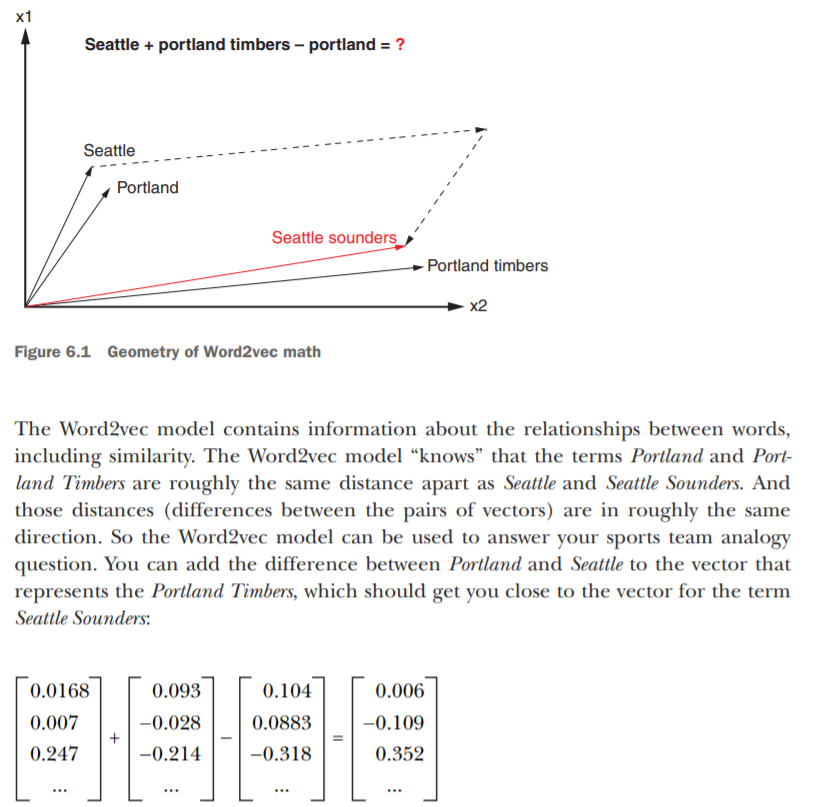

In [107]:
Image.open('word2vec.png')

### How to compute Word2vec representations
- **The skip-gram approach predicts the context of words (output words) from a word of interest (the input word).**
-  **The continuous bag-of-words (CBOW) approach predicts the target word (the output word) from the nearby words (input words). We show you how and when to use each of these to train a Word2vec model in the coming sections.**

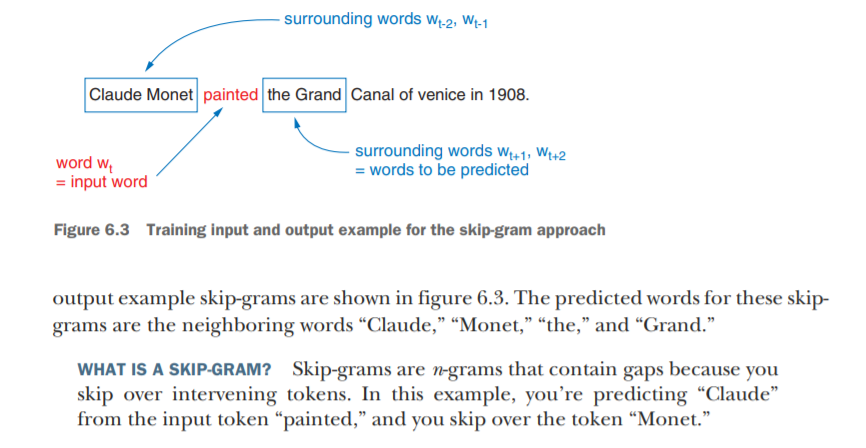

In [108]:
Image.open('skipgram.png')

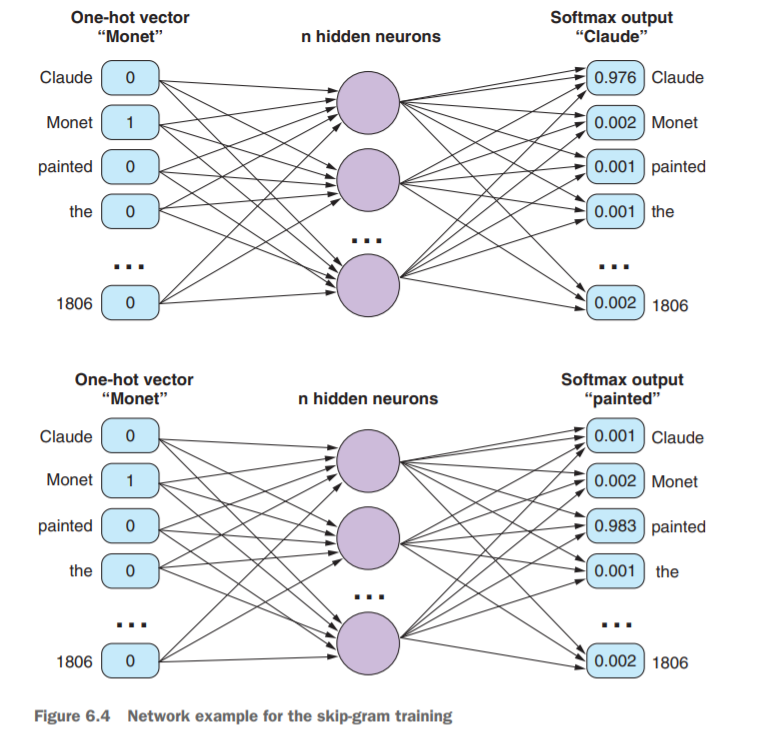

In [109]:
Image.open('skipgram1.png')

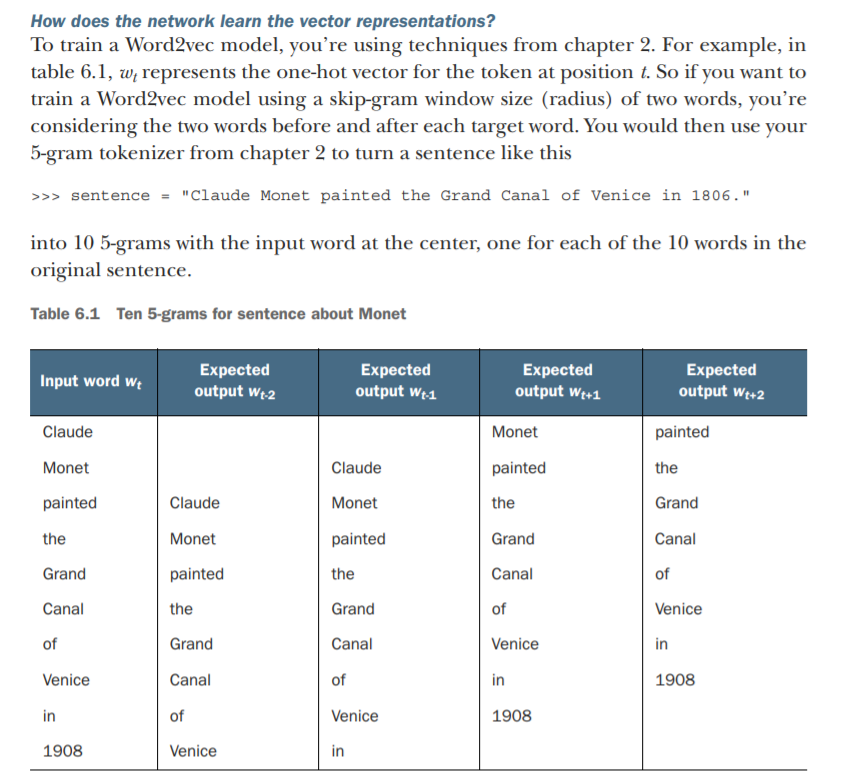

In [110]:
Image.open('skipgram2.png')

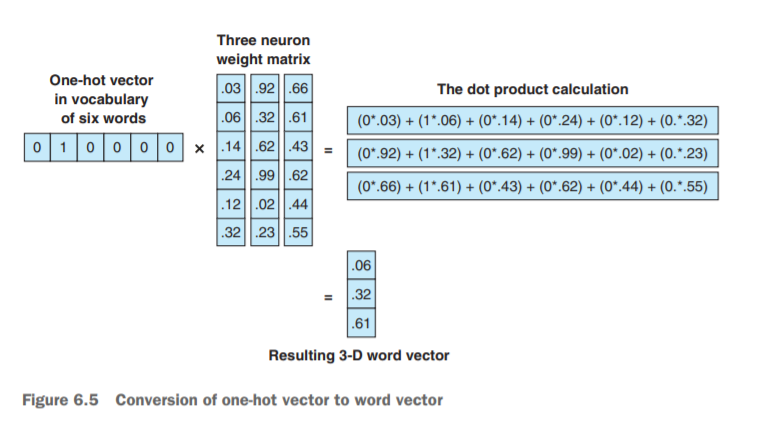

In [111]:
Image.open('skipgram3.png')

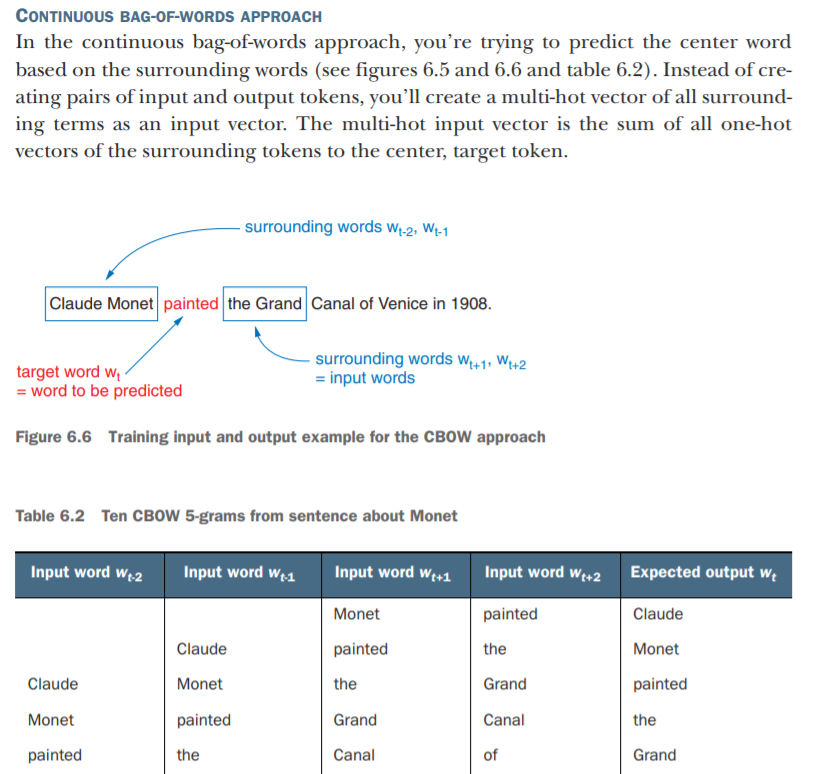

In [112]:
Image.open('cbow.png')

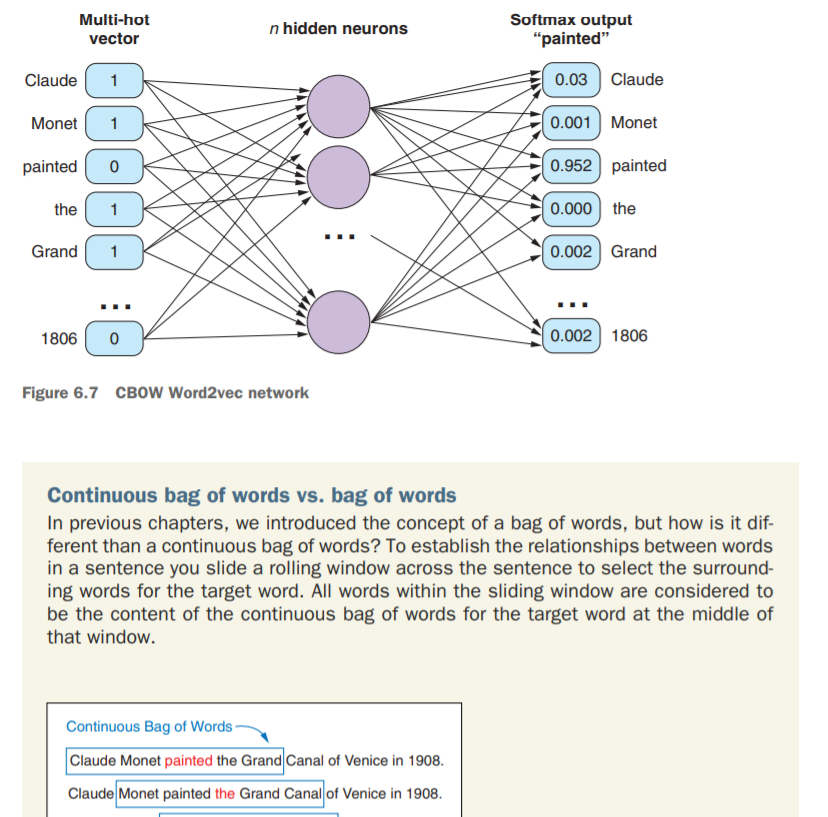

In [113]:
Image.open('cbow1.png')

In [114]:
from gensim.models.word2vec import Word2Vec

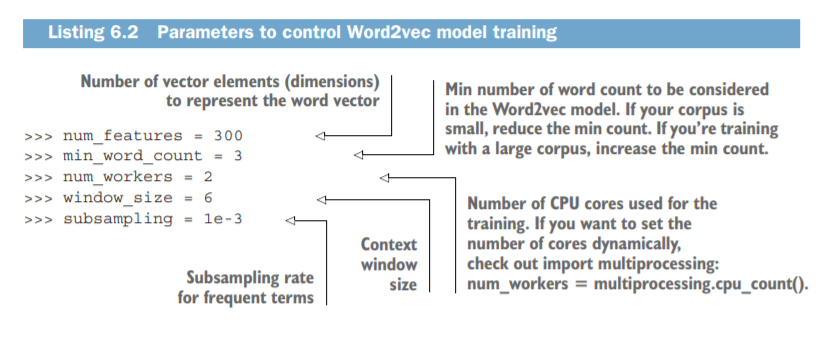

In [115]:
Image.open('w2v.png')

In [116]:
 token_list =[
['to', 'provide', 'early', 'intervention/early', 'childhood', 'special',
'education', 'services', 'to', 'eligible', 'children', 'and', 'their','c',
'families'],
['essential', 'job', 'functions'],
['participate', 'as', 'a', 'transdisciplinary', 'team', 'member', 'to',
'complete', 'educational', 'assessments', 'for']]
token_list

[['to',
  'provide',
  'early',
  'intervention/early',
  'childhood',
  'special',
  'education',
  'services',
  'to',
  'eligible',
  'children',
  'and',
  'their',
  'c',
  'families'],
 ['essential', 'job', 'functions'],
 ['participate',
  'as',
  'a',
  'transdisciplinary',
  'team',
  'member',
  'to',
  'complete',
  'educational',
  'assessments',
  'for']]

In [117]:
model = Word2Vec(
token_list,
workers= 2,
size= 300,
min_count= 3,
window= 6,
sample= 1e-3)

model.init_sims(replace=True) # The following command will discard the unneeded output weights of your neural network
model_name = "my_domain_specific_word2vec_model"
model.save(model_name)

In [118]:
model_name = "my_domain_specific_word2vec_model"
model = Word2Vec.load(model_name)
# model.most_similar('children')

**Researchers from Facebook took the concept of Word2vec one step further25 by adding a new twist to the model training. The new algorithm, which they named fastText, predicts the surrounding n-character grams rather than just the surrounding words,
like Word2vec does.** 
- **For example, the word “whisper” would generate the following 2-and 3-character grams: wh, whi, hi, his, is, isp, sp, spe, pe, per, er fastText trains a vector representation for every n-character gram, which includes words, misspelled words, partial words, and even single characters. The advantage of this approach is that it handles rare words much better than the original Word2vec approach.**

- **Advantages of LSA are**
-  Faster training
- Better discrimination between longer documents
- **Advantages of Word2vec and GloVe are**
- More efficient use of large corpora
- More accurate reasoning with words, such as answering analogy questions 

### Doc2vec

In [119]:
corpus = ['apple company releases a new mobile',
         'samsung TV is the most popular one',
         'james bond movies are made in england',
         'bollywood movies got international fame',
         'mamazon careers will have data science jobs',
         'microsoft has its own could platform',
         'I like cricket',
         'test cricket is so boring',
         'I play tennis matches well',
         'I always drive faster cars',
         'ferrari is the fastest driving car']

In [120]:
import multiprocessing
from gensim.models.doc2vec import TaggedDocument,Doc2Vec
from gensim.utils import simple_preprocess

In [121]:
num_cores = multiprocessing.cpu_count()
training_corpus = []
for i, sample in enumerate(corpus):
    tagged_doc = TaggedDocument(simple_preprocess(sample), [i])
    training_corpus.append(tagged_doc)
    
training_corpus    

[TaggedDocument(words=['apple', 'company', 'releases', 'new', 'mobile'], tags=[0]),
 TaggedDocument(words=['samsung', 'tv', 'is', 'the', 'most', 'popular', 'one'], tags=[1]),
 TaggedDocument(words=['james', 'bond', 'movies', 'are', 'made', 'in', 'england'], tags=[2]),
 TaggedDocument(words=['bollywood', 'movies', 'got', 'international', 'fame'], tags=[3]),
 TaggedDocument(words=['mamazon', 'careers', 'will', 'have', 'data', 'science', 'jobs'], tags=[4]),
 TaggedDocument(words=['microsoft', 'has', 'its', 'own', 'could', 'platform'], tags=[5]),
 TaggedDocument(words=['like', 'cricket'], tags=[6]),
 TaggedDocument(words=['test', 'cricket', 'is', 'so', 'boring'], tags=[7]),
 TaggedDocument(words=['play', 'tennis', 'matches', 'well'], tags=[8]),
 TaggedDocument(words=['always', 'drive', 'faster', 'cars'], tags=[9]),
 TaggedDocument(words=['ferrari', 'is', 'the', 'fastest', 'driving', 'car'], tags=[10])]

In [122]:
# model = Doc2Vec(vector_size=100, 
#                 min_count=2,
#                 workers=num_cores, epochs=10)
# model.build_vocab(training_corpus)
# model.train(training_corpus, total_examples=model.corpus_count,epochs=model.epochs)

In [123]:
## Train doc2vec model
model = Doc2Vec(training_corpus, vector_size=20, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
model.save("test_doc2vec.model")
## Load saved doc2vec model
model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
model.wv.vocab

{'apple': <gensim.models.keyedvectors.Vocab at 0x260a4d3d6c8>,
 'company': <gensim.models.keyedvectors.Vocab at 0x260a4d3d808>,
 'releases': <gensim.models.keyedvectors.Vocab at 0x260a4d3d888>,
 'new': <gensim.models.keyedvectors.Vocab at 0x260a4d3d908>,
 'mobile': <gensim.models.keyedvectors.Vocab at 0x260a4d3d988>,
 'samsung': <gensim.models.keyedvectors.Vocab at 0x260a4d3da08>,
 'tv': <gensim.models.keyedvectors.Vocab at 0x260a4d3da88>,
 'is': <gensim.models.keyedvectors.Vocab at 0x260a4d3db08>,
 'the': <gensim.models.keyedvectors.Vocab at 0x260a4d3db88>,
 'most': <gensim.models.keyedvectors.Vocab at 0x260a4d3dc08>,
 'popular': <gensim.models.keyedvectors.Vocab at 0x260a4d3dc88>,
 'one': <gensim.models.keyedvectors.Vocab at 0x260a4d3dd08>,
 'james': <gensim.models.keyedvectors.Vocab at 0x260a4d3dd88>,
 'bond': <gensim.models.keyedvectors.Vocab at 0x260a4d3de08>,
 'movies': <gensim.models.keyedvectors.Vocab at 0x260a4d3de88>,
 'are': <gensim.models.keyedvectors.Vocab at 0x260a4d3df08

In [124]:
# find most similar doc 
test_doc = simple_preprocess("I like faster cars")
model.docvecs.most_similar(positive=[model.infer_vector(test_doc)],topn=5)

[(4, 0.40846797823905945),
 (0, 0.3480378985404968),
 (10, 0.3138082027435303),
 (6, 0.29146790504455566),
 (3, 0.2368023842573166)]

### pattern hardcodeing

In [129]:
def get_greetings(text):
    if text[0] == 'H':
        if text[:3] in ['Hi', 'Hi ', 'Hi!', 'Hi,', 'Hey']:
            return text[:3]
        elif text[:5] in ['Hello', 'Hello!', 'Hello,', 'Hello ']:
            return text[:5]
    elif text[0] == 'Y':
        if text[1] == 'o' and text[:2] in ['Yo', 'Yo!', 'Yo,', 'Yo ']:
            return text[:2]
    return None    

In [130]:
get_greetings('Hey! how are you')

'Hey'

In [131]:
get_greetings('Hi there! how are you')

'Hi '

In [132]:
get_greetings('Hello! how are you')

'Hello'

### RegX

#### Regx for gps coordinates

In [134]:
import re

In [139]:
lat = r'([-]?[0-9]?[0-9][.][0-9]{2,10})'
lon = r'([-]?1?[0-9]?[0-9][.][0-9]{2,10})'
sep = r'[,/ ]{1,3}'
re_gps = re.compile(lat+sep+lon)

In [140]:
re_gps.findall('http://...maps/@34.0551066,-118.2496763...')

[('34.0551066', '-118.2496763')]

In [141]:
re_gps.findall("https://www.openstreetmap.org/#map=10/5.9666/116.0566")

[('5.9666', '116.0566')]

In [142]:
re_gps.findall("Zig Zag Cafe is at 45.344, -121.9431 on my GPS.")

[('45.344', '-121.9431')]

### Regx for dates

In [152]:
reg_dates = r'([\d]{1,4}[-/][\d]{1,2}[-/][\d]{2,4})'
dates_reg = re.compile(reg_dates)

In [153]:
dates_reg.findall(' Indian independense day will be on 15/10/2021')

['15/10/2021']

In [154]:
dates_reg.findall(' Indian independense day will be on 15-10-2021')

['15-10-2021']

In [155]:
dates_reg.findall(' Indian independense day will be on 2021/10/15')

['2021/10/15']

In [156]:
dates_reg.findall(' Indian independense day will be on 15/10/2021 - 18/10/2021')

['15/10/2021', '18/10/2021']